<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [15]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Para la visualización 
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Otros objetivos
# -----------------------------------------------------------------------
import math
from itertools import combinations
import sys
sys.path.append('src') 
from src import support as sp  

# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 


In [16]:
df=pd.read_csv("data/df_filtrado.csv",index_col=0)
df.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,fuelType,brand,notRepairedDamage,powerCV_robust,kilometer_robust
0,private,offer,480.0,test,other,1990-1999,manually,petrol,volkswagen,desconocido,-0.050725,0.0
1,private,offer,18300.0,test,coupe,2010-2019,manually,diesel,audi,yes,1.072464,-1.0
2,private,offer,9800.0,test,suv,2000-2009,automatic,diesel,jeep,desconocido,0.695652,-1.0
3,private,offer,1500.0,test,small car,2000-2009,manually,petrol,volkswagen,no,-0.565217,0.0
4,private,offer,3600.0,test,small car,2000-2009,manually,diesel,skoda,no,-0.652174,-2.4


In [17]:
df.shape

(349963, 12)

In [18]:
df.isna().sum()

seller                0
offerType             0
price                 0
abtest                0
vehicleType           0
yearOfRegistration    0
gearbox               0
fuelType              0
brand                 0
notRepairedDamage     0
powerCV_robust        0
kilometer_robust      0
dtype: int64

In [19]:
lista_col_categ = df.select_dtypes(include="O").columns.tolist()
lista_col_categ

['seller',
 'offerType',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'fuelType',
 'brand',
 'notRepairedDamage']

In [20]:
lista_col_num = df.select_dtypes(include=np.number).columns.tolist()
lista_col_num

['price', 'powerCV_robust', 'kilometer_robust']

In [21]:
for column in df.select_dtypes(include="O").columns:
    print(f"Columna '{column.upper()}':")
    print(df[column].value_counts())
    print("\n-----------------------------")

Columna 'SELLER':
seller
private       349961
commercial         2
Name: count, dtype: int64

-----------------------------
Columna 'OFFERTYPE':
offerType
offer      349958
request         5
Name: count, dtype: int64

-----------------------------
Columna 'ABTEST':
abtest
test       181301
control    168662
Name: count, dtype: int64

-----------------------------
Columna 'VEHICLETYPE':
vehicleType
other          126535
small car       74753
combi           65194
bus             29550
convertible     22015
coupe           17654
suv             14262
Name: count, dtype: int64

-----------------------------
Columna 'YEAROFREGISTRATION':
yearOfRegistration
2000-2009    189095
1990-1999     83139
2010-2019     68520
1980-1989      5749
1970-1979      2153
1960-1969      1010
1950-1959       199
1930-1939        51
1940-1949        33
1920-1929        14
Name: count, dtype: int64

-----------------------------
Columna 'GEARBOX':
gearbox
manually       260200
automatic       74302
desconocido

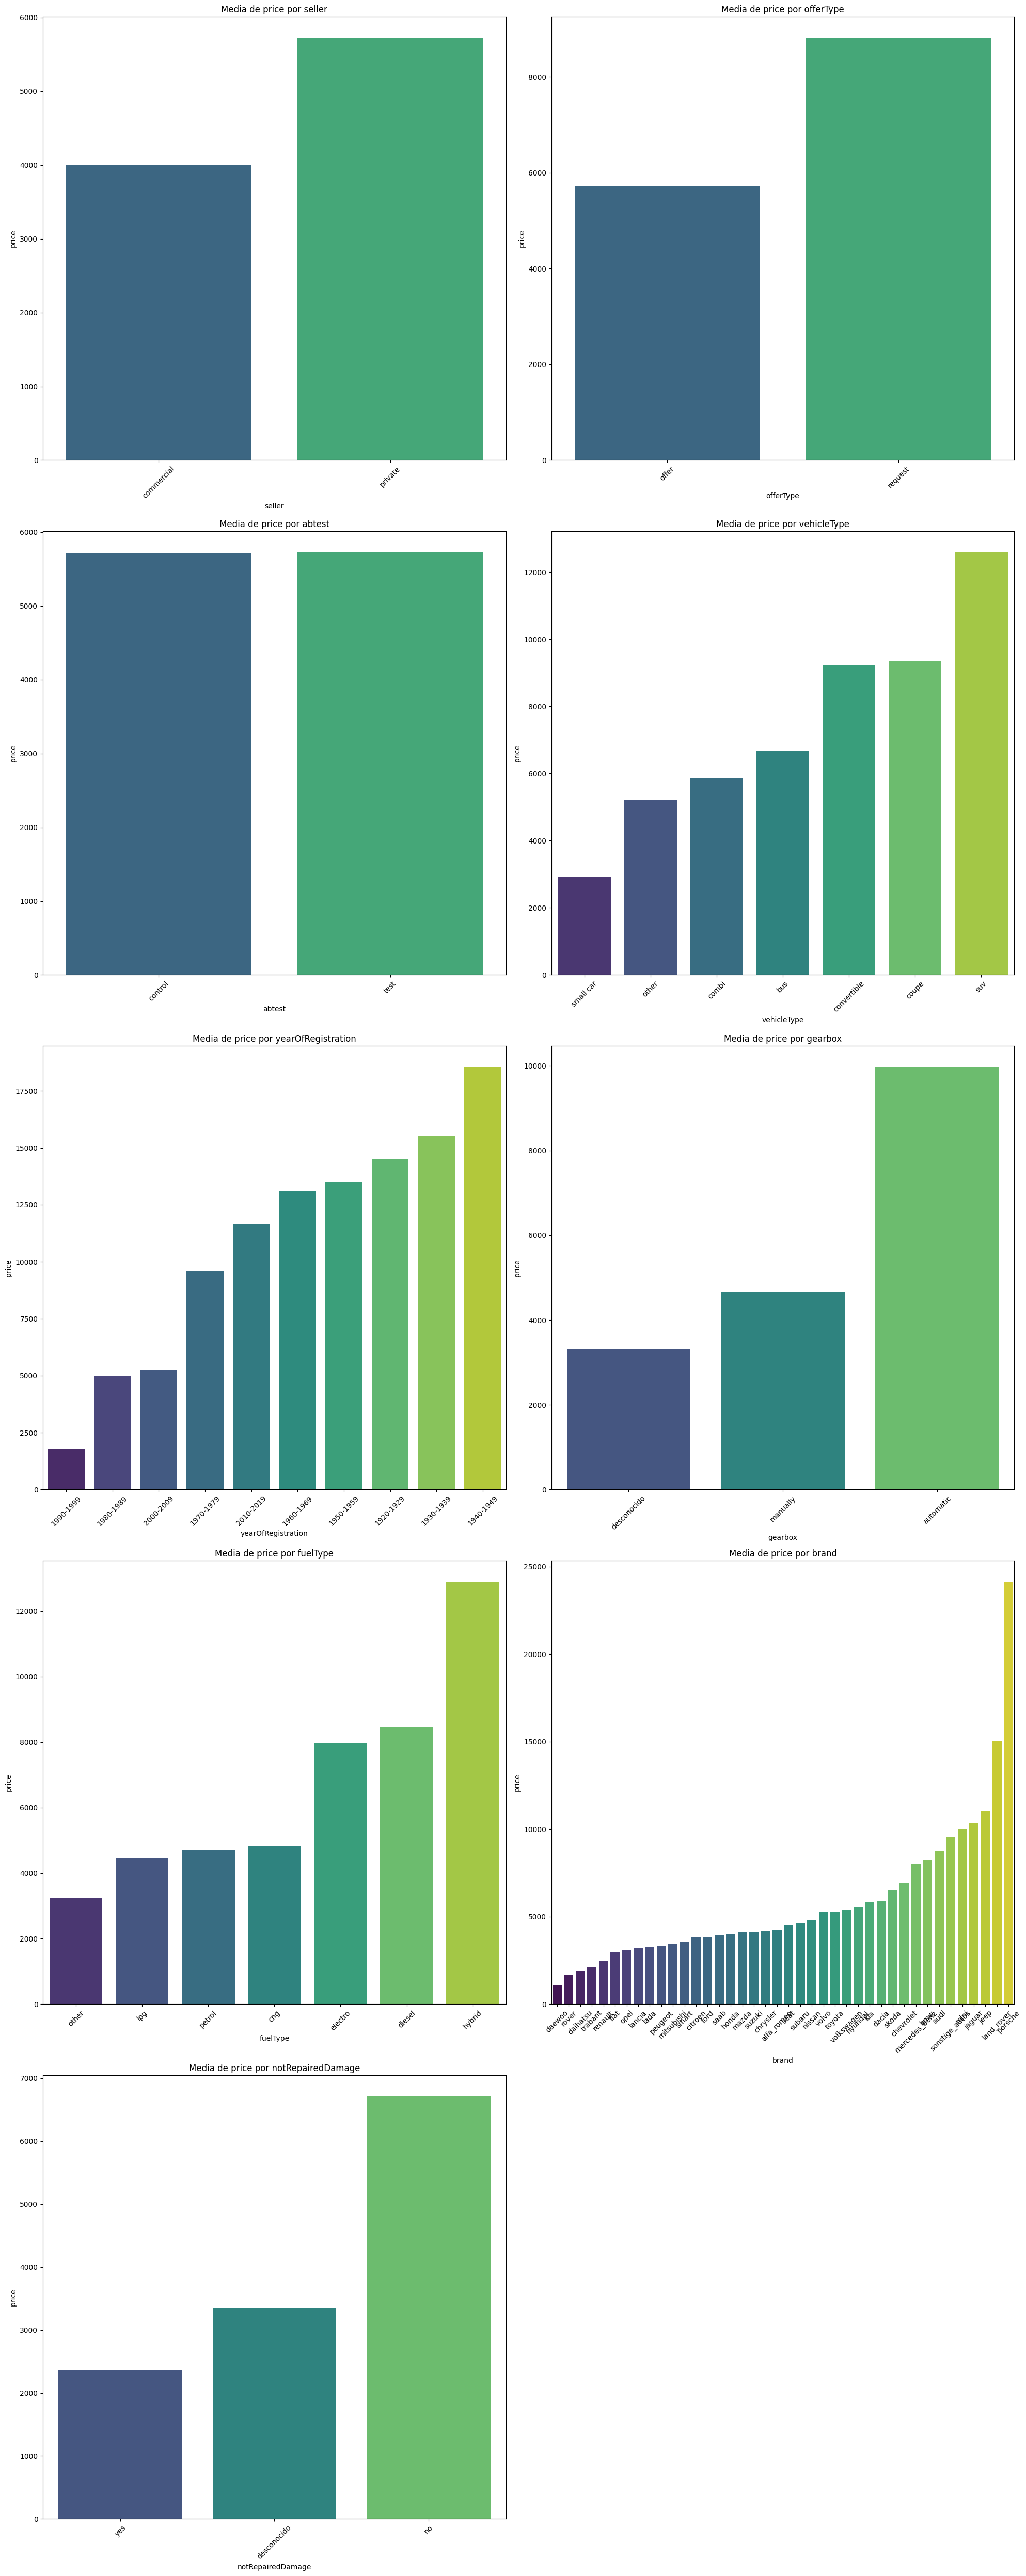

In [22]:
sp.crear_barplot(df,lista_col_categ,"price")

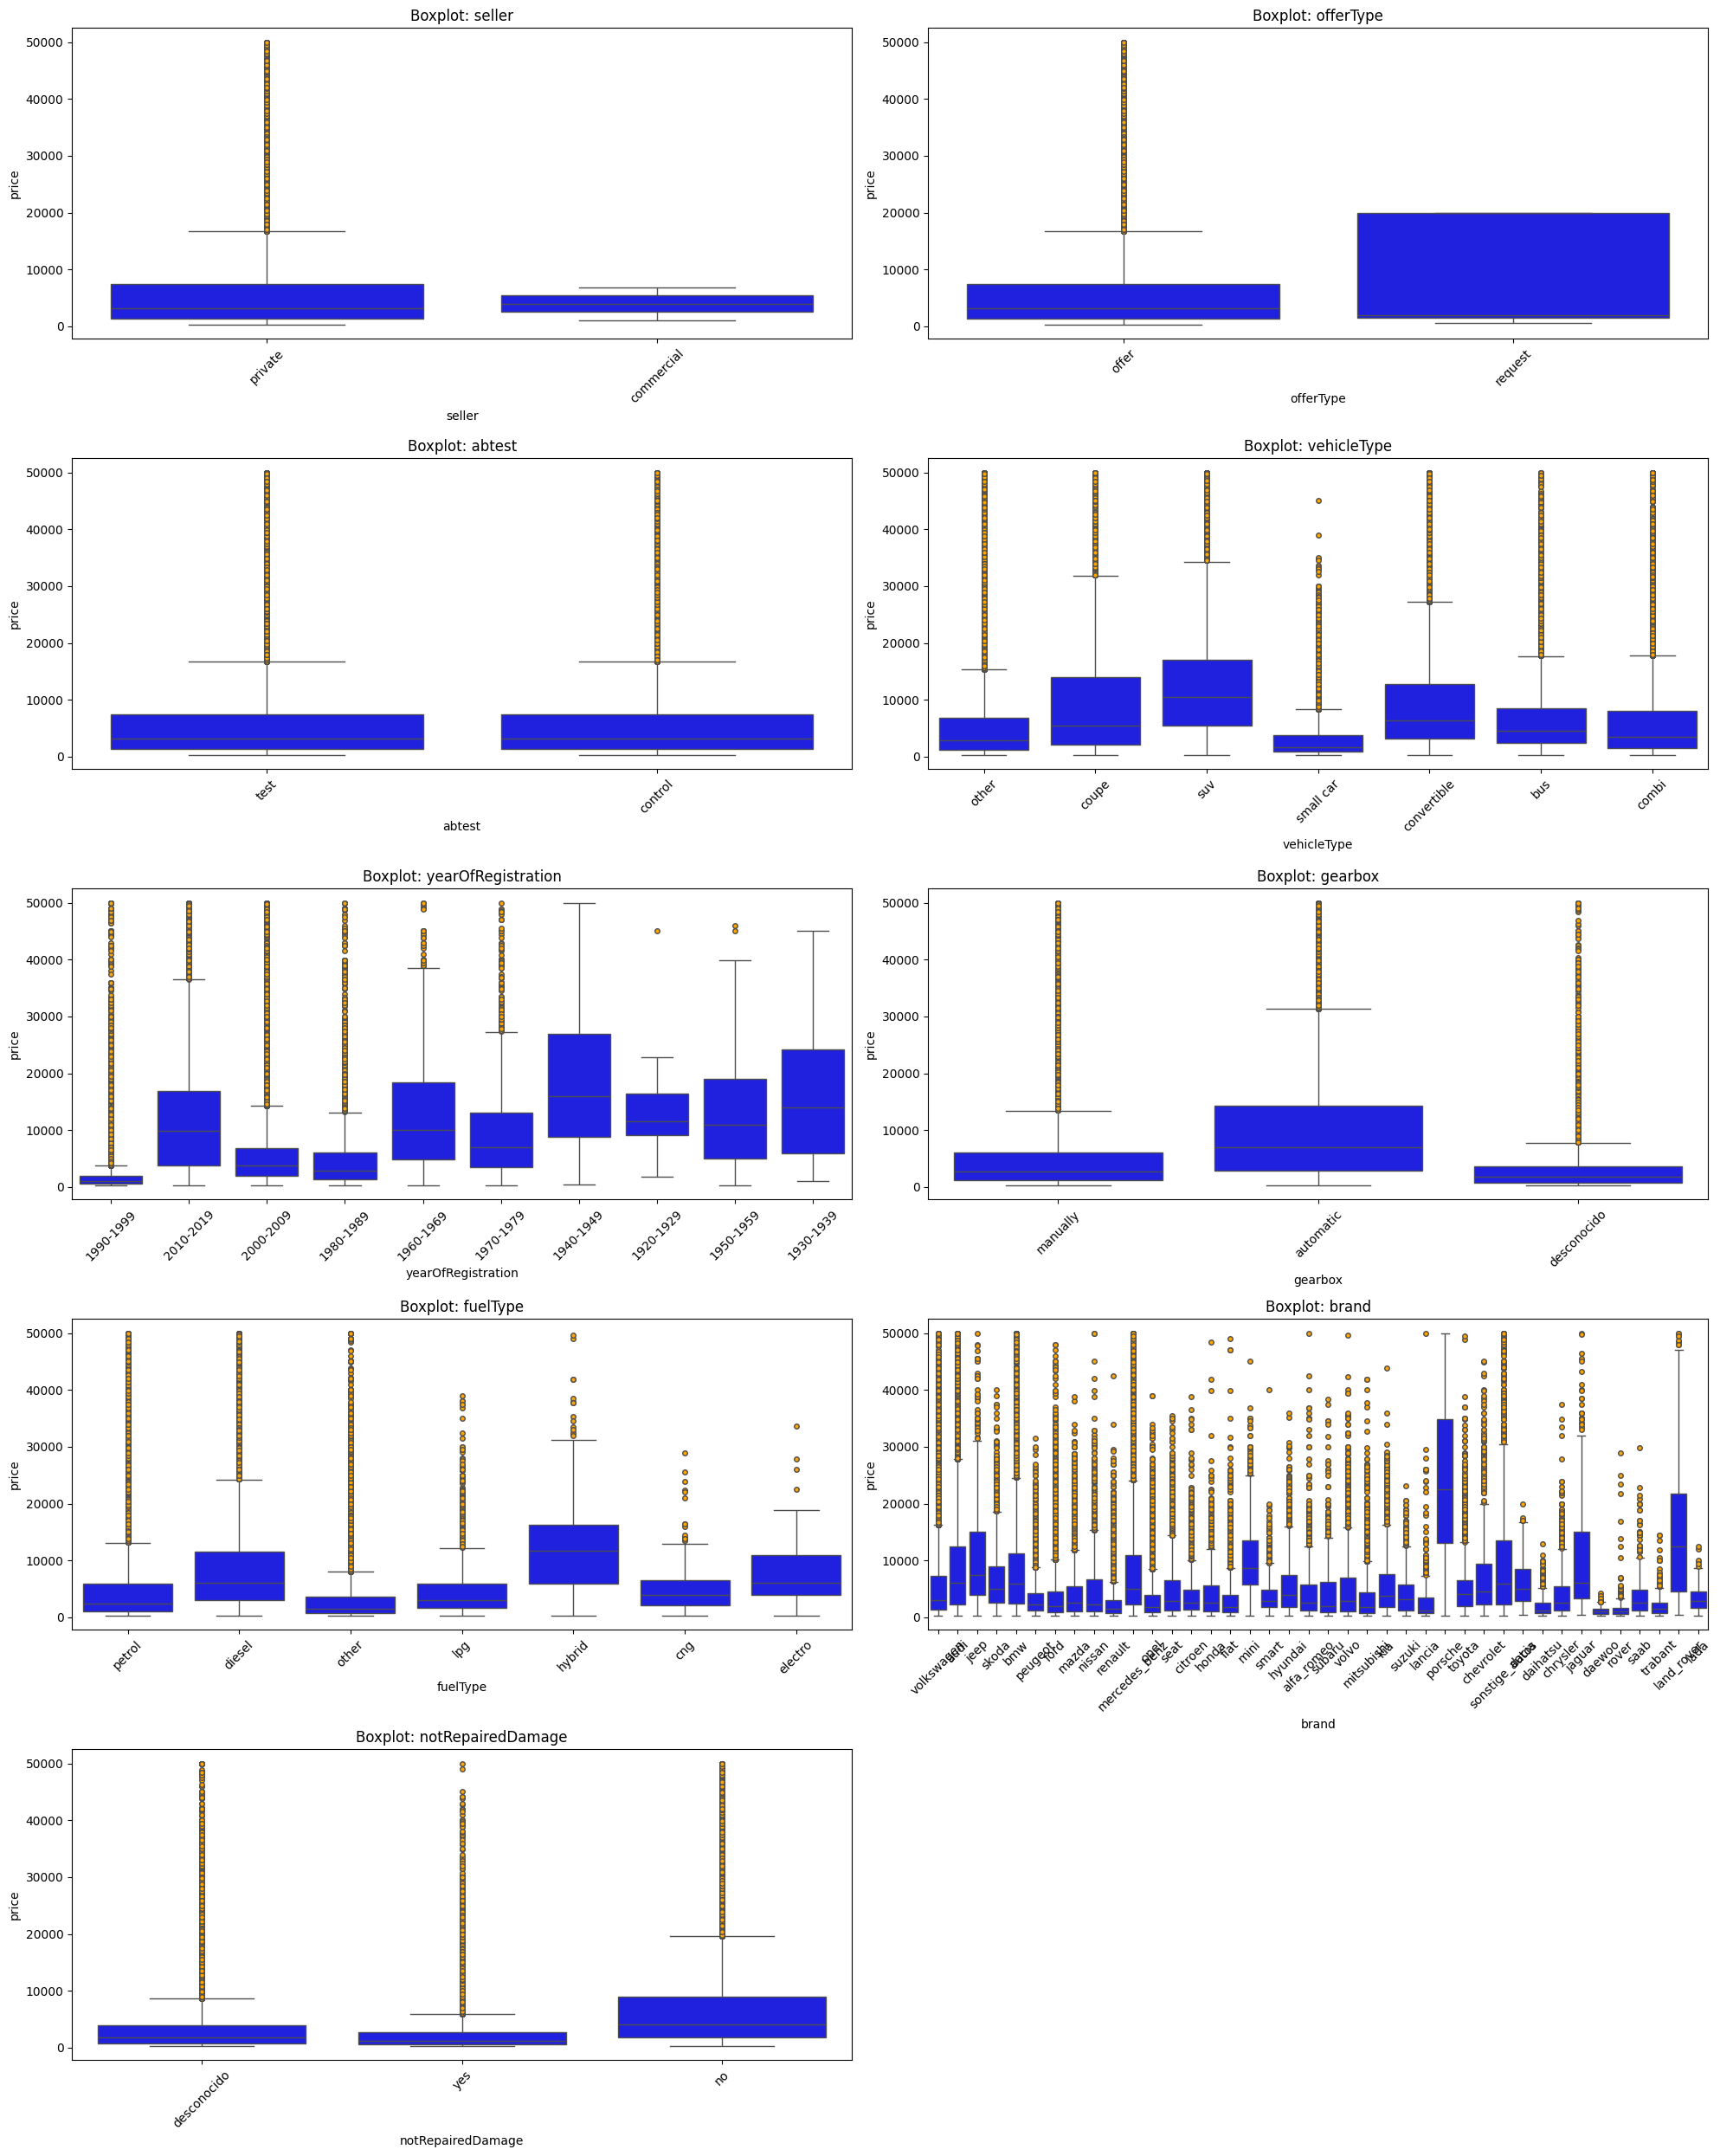

In [23]:
sp.crear_boxplot(df,lista_col_categ,"price")

In [25]:
df_gde=sp.get_dummies_encoding(df, lista_col_categ, prefix=None, prefix_sep="_")
df_gde

,price,powerCV_robust,kilometer_robust,seller_commercial,seller_private,offerType_offer,offerType_request,abtest_control,abtest_test,vehicleType_bus,vehicleType_combi,vehicleType_convertible,vehicleType_coupe,vehicleType_other,vehicleType_small car,vehicleType_suv,yearOfRegistration_1920-1929,yearOfRegistration_1930-1939,yearOfRegistration_1940-1949,yearOfRegistration_1950-1959,yearOfRegistration_1960-1969,yearOfRegistration_1970-1979,yearOfRegistration_1980-1989,yearOfRegistration_1990-1999,yearOfRegistration_2000-2009,yearOfRegistration_2010-2019,gearbox_automatic,gearbox_desconocido,gearbox_manually,fuelType_cng,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_desconocido,notRepairedDamage_no,notRepairedDamage_yes
0,480.0,-0.050725,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,18300.0,1.072464,-1.0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9800.0,0.695652,-1.0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1500.0,-0.565217,0.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,3600.0,-0.652174,-2.4,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349958,2200.0,-0.485507,-5.2,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
349959,1199.0,-0.188406,-1.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
349960,9200.0,-0.173913,0.0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
349961,3400.0,-0.202899,0.0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [26]:
df_le=sp.label_encoding(df, lista_col_categ)
df_le

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,fuelType,brand,notRepairedDamage,powerCV_robust,kilometer_robust
0,1,0,480.0,1,4,7,2,6,38,0,-0.050725,0.0
1,1,0,18300.0,1,3,9,2,1,1,2,1.072464,-1.0
2,1,0,9800.0,1,6,8,0,1,14,0,0.695652,-1.0
3,1,0,1500.0,1,5,8,2,6,38,1,-0.565217,0.0
4,1,0,3600.0,1,5,8,2,1,31,1,-0.652174,-2.4
...,...,...,...,...,...,...,...,...,...,...,...,...
349958,1,0,2200.0,1,4,8,1,5,33,0,-0.485507,-5.2
349959,1,0,1199.0,1,2,8,0,6,32,1,-0.188406,-1.0
349960,1,0,9200.0,1,0,7,2,1,38,1,-0.173913,0.0
349961,1,0,3400.0,1,1,8,2,1,38,0,-0.202899,0.0


In [27]:
df_te=sp.target_encoding(df, lista_col_categ, "price")
df_te

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,fuelType,brand,notRepairedDamage,powerCV_robust,kilometer_robust
0,5722.744529,5722.69042,480.0,5723.869135,5212.719911,1769.244434,4654.329823,4702.257069,5407.374502,3346.962677,-0.050725,0.0
1,5722.744529,5722.69042,18300.0,5723.869135,9342.620539,11654.559866,4654.329823,8454.021359,8769.608410,2369.921733,1.072464,-1.0
2,5722.744529,5722.69042,9800.0,5723.869135,12585.761184,5236.859483,9965.928441,8454.021359,11022.921594,3346.962677,0.695652,-1.0
3,5722.744529,5722.69042,1500.0,5723.869135,2912.480757,5236.859483,4654.329823,4702.257069,5407.374502,6707.871077,-0.565217,0.0
4,5722.744529,5722.69042,3600.0,5723.869135,2912.480757,5236.859483,4654.329823,8454.021359,6512.590235,6707.871077,-0.652174,-2.4
...,...,...,...,...,...,...,...,...,...,...,...,...
349958,5722.744529,5722.69042,2200.0,5723.869135,5212.719911,5236.859483,3311.581592,3231.275073,9562.611257,3346.962677,-0.485507,-5.2
349959,5722.744529,5722.69042,1199.0,5723.869135,9217.484988,5236.859483,9965.928441,4702.257069,3566.468586,6707.871077,-0.188406,-1.0
349960,5722.744529,5722.69042,9200.0,5723.869135,6666.113367,1769.244434,4654.329823,8454.021359,5407.374502,6707.871077,-0.173913,0.0
349961,5722.744529,5722.69042,3400.0,5723.869135,5845.597432,5236.859483,4654.329823,8454.021359,5407.374502,3346.962677,-0.202899,0.0


In [28]:
df_fe=sp.frequency_encoding(df, lista_col_categ)
df_fe

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,fuelType,brand,notRepairedDamage,powerCV_robust,kilometer_robust
0,0.999994,0.999986,480.0,0.518058,0.361567,0.237565,0.743507,0.603615,0.214540,0.177619,-0.050725,0.0
1,0.999994,0.999986,18300.0,0.518058,0.050445,0.195792,0.743507,0.301415,0.090104,0.089484,1.072464,-1.0
2,0.999994,0.999986,9800.0,0.518058,0.040753,0.540329,0.212314,0.301415,0.002223,0.177619,0.695652,-1.0
3,0.999994,0.999986,1500.0,0.518058,0.213603,0.540329,0.743507,0.603615,0.214540,0.732897,-0.565217,0.0
4,0.999994,0.999986,3600.0,0.518058,0.213603,0.540329,0.743507,0.301415,0.015802,0.732897,-0.652174,-2.4
...,...,...,...,...,...,...,...,...,...,...,...,...
349958,0.999994,0.999986,2200.0,0.518058,0.361567,0.540329,0.044179,0.077525,0.008681,0.177619,-0.485507,-5.2
349959,0.999994,0.999986,1199.0,0.518058,0.062907,0.540329,0.212314,0.603615,0.014690,0.732897,-0.188406,-1.0
349960,0.999994,0.999986,9200.0,0.518058,0.084437,0.237565,0.743507,0.301415,0.214540,0.732897,-0.173913,0.0
349961,0.999994,0.999986,3400.0,0.518058,0.186288,0.540329,0.743507,0.301415,0.214540,0.177619,-0.202899,0.0


In [ ]:
df_gde.to_csv('results/df_gde.csv', index=False)
df_le.to_csv('results/df_le.csv', index=False)
df_te.to_csv('results/df_te.csv', index=False)
df_fe.to_csv('results/df_fe.csv', index=False)
